In [1]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.font_manager as fm
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

# 정책브리핑 네트워크 그래프

In [2]:
df_raw = pd.read_csv('./정책브리핑 태양광.csv', encoding='euc-kr')
df_nouns = df_raw.copy()

In [3]:
df_nouns

,Unnamed: 0,내용
0,0,내년 산지 태양광 시설 여개 대해 특별 안전 점검 시행 또 여개 달 산지 태양광 설...
1,1,산업 통상 자원부 수도권 폭우 관련 에너지 안전 대책 반 구성 피해 상황 점검 및 ...
2,2,정부 민간 주도 성장 경제 활 높이 규제 어려움 기업 현장 애로 해소 위해 단기간 ...
3,3,원자력발전 국내 뿐 전 세계 다시 주목 최근 유럽연합 의회 원자력발전 그린 택 노미...
4,4,국토교통부 새만금개발청 새만금 국가 산업 단지 공구 를 국내 최초 스마트 그린 국가...
...,...,...
135,135,정부 탄소 배출량 수량 실질 탄소 중립 목표 지방정부 역할 강조 목소리 코로나 방역...
136,136,올해 기업 등 소비자 재생에너지 전기 선택 구매 사용 수 한국 제도 도입 산업 통상...
137,137,한해 단어 코로나 전 세계 코로나 감염병 온 위기 속 혼란 국내 상황 마찬가지 것 ...
138,138,한해 단어 코로나 전 세계 코로나 감염병 온 위기 속 혼란 국내 상황 마찬가지 것 ...


In [4]:
nouns = []

for i in df_nouns['내용']:
    nouns.append(i.split(' '))

In [5]:
print(nouns[:2])

[['내년', '산지', '태양광', '시설', '여개', '대해', '특별', '안전', '점검', '시행', '또', '여개', '달', '산지', '태양광', '설비', '전기', '안전', '검사', '주기', '단축키', '산업', '통상', '자원부', '최근', '집중호우', '산지', '태양광', '대한', '국민', '우려', '산지', '태양광', '안전', '관리', '특별', '대책', '마련', '전국', '산지', '태양광', '지난', '정부', '대폭', '현재', '모두', '개', '운영', '최근', '기록', '집중호우', '발생', '산사태', '중', '일부', '인근', '소재', '산지', '태양광', '관련성', '지적', '제기', '이번', '대책', '마련', '산업부', '설명', '먼저', '상대', '안전', '취약', '특별', '관리', '산지', '태양광', '여개', '전체', '산지', '태양광', '를', '선정', '기관', '안전', '점검', '시행', '계획', '해당', '태양광', '설비', '대해', '내년', '정기', '검사', '특별', '안전', '점검', '형태', '매년', '실시', '계획', '안전', '관리', '효과', '위해', '최대한', '여름철', '이전', '상반기', '중', '점검', '완료', '계획', '특별', '관리', '산지', '태양광', '산사태', '위험', '등급', '사고', '이력', '지자체', '의견', '등', '종합', '선정', '올해', '안전', '점검', '추진', '계획', '태양광', '발전', '시설', '취약', '설비', '외', '모든', '산지', '태양광', '설비', '여개', '대해', '현재', '주기', '내년', '주기', '전기', '안전', '정기', '검사', '실시', '안전', '관리', '대폭', '산사태', '등', '대비', '안전', '검사', '전문성', '위해', '점검', '

In [6]:
stopwords = ['등', '고', '를', '이', '것', '위', '위해', '수', '통해', '및', '대한', '적극', '사진', '문의']

In [7]:
# 데이터 전처리
res = []
for i in nouns:
    tmp = ' '.join(i)
    tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)
    tmp = tmp.split(' ')
    tmp = [j for j in i if len(j)!=1]
    tmp = [i for i in tmp if i != '']
    tmp = [i for i in tmp if i not in stopwords]
    res.append(list(set(tmp)))
    # res.append(tmp)

<>:5: DeprecationWarning: invalid escape sequence '\s'
<>:5: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_34824\1002771128.py:5: DeprecationWarning: invalid escape sequence '\s'
  tmp = re.sub('[^가-힣a-zA-Z\s]', '', tmp)


In [8]:
te=TransactionEncoder()
te_arry=te.fit(res).transform(res)
df=pd.DataFrame(te_arry, columns=te.columns_)

In [9]:
support_list=[0.65, 0.6, 0.55, 0.5]
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


total=[]
for i in support_list:
    frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
    row=[]
    for j in con_list:
        tmp= association_rules(frequent_itemsets, metric="confidence", min_threshold=j)
        row.append(len(tmp))
    total.append(row)
total

[[28, 28, 28, 28, 28, 28, 27, 17, 11],
 [94, 94, 94, 94, 94, 94, 82, 62, 23],
 [314, 314, 314, 314, 314, 290, 271, 139, 53],
 [848, 848, 848, 848, 848, 772, 620, 330, 118]]

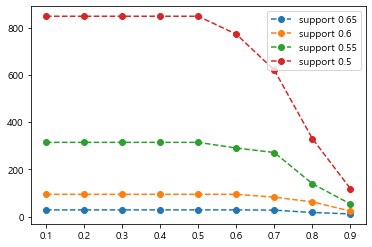

In [10]:
con_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
support_list=[0.65, 0.6, 0.55, 0.5]

for y,name in zip(total,support_list):

    plt.plot(con_list,y,'o',linestyle='dashed', label='support ' + str(name))
    plt.legend()

C:\Users\user\.conda\envs\han\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


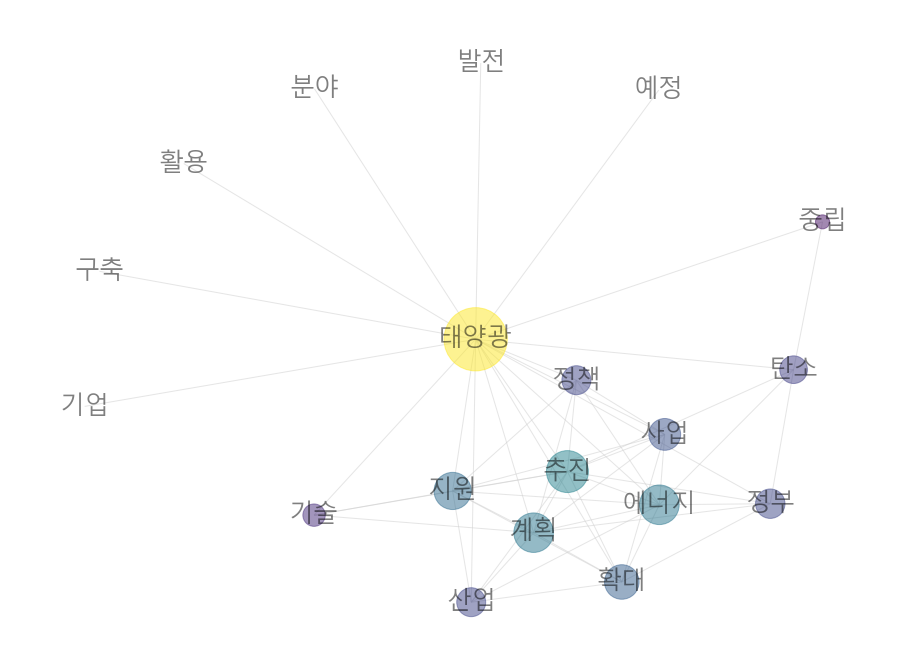

In [11]:
# fit, transform, apriori
te=TransactionEncoder()
te_arry=te.fit(res).transform(res)
df_te=pd.DataFrame(te_arry, columns=te.columns_)
frequency_itemsets=apriori(df_te, use_colnames=True, min_support=0.55, max_len=2)


# length 2만 추출
tmp = []
for i in frequency_itemsets['itemsets']:
    tmp.append(len(i))
frequency_itemsets['length'] = tmp
frequency_itemsets = frequency_itemsets[frequency_itemsets['length'] == 2]


# 네트워크 그래프
ar=frequency_itemsets['itemsets']
G=nx.Graph()
G.add_edges_from(ar)
pr=nx.pagerank(G)

nsize=np.array([v for v in pr.values()])
nsize=4000*(nsize-min(nsize))/(max(nsize)-min(nsize))

plt.figure(figsize=(16,12)); plt.axis('off')
fname = fm.FontProperties().get_name()
nx.draw_networkx(G, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.5, edge_color='0.8', #cmap=plt.cm.YlGn,
                 font_family=fname,font_size=25)

plt.savefig('정책브리핑_태양광_네트워크.png')
plt.show()

In [13]:
len(nouns)

140

In [18]:
cnt = 0
for noun in nouns:
    cnt = cnt + len(noun)

In [19]:
cnt

82397